<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
# Libraries for data preparation and model building
import xgboost as xgb
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
# Setting global constants to ensure notebook results are reproducible
PARAMETER_CONSTANT = 42

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [5]:
df = pd.read_csv("../Time Series Project/df_train.csv")
df_test = pd.read_csv("../Time Series Project/df_test.csv")

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [7]:
df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract(r'(\d+)').astype(float)
df['Seville_pressure'] = df['Seville_pressure'].str.extract(r'(\d+)').astype(float)
print(df.info()) #checking the data type of each column in the data
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [8]:
df.head(10).T 

,0,1,2,3,4,5,6,7,8,9
Unnamed: 0,0,1,2,3,4,5,6,7,8,9
time,2015-01-01 03:00:00,2015-01-01 06:00:00,2015-01-01 09:00:00,2015-01-01 12:00:00,2015-01-01 15:00:00,2015-01-01 18:00:00,2015-01-01 21:00:00,2015-01-02 00:00:00,2015-01-02 03:00:00,2015-01-02 06:00:00
Madrid_wind_speed,0.666667,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Valencia_wind_deg,5.0,10.0,9.0,8.0,7.0,7.0,8.0,9.0,9.0,9.0
Bilbao_rain_1h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valencia_wind_speed,0.666667,1.666667,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.333333
Seville_humidity,74.333333,78.333333,71.333333,65.333333,59.0,69.666667,83.666667,83.666667,86.0,87.0
Madrid_humidity,64.0,64.666667,64.333333,56.333333,57.0,67.333333,63.333333,64.0,63.333333,63.666667
Bilbao_clouds_all,0.0,0.0,0.0,0.0,2.0,12.333333,16.333333,8.666667,5.333333,15.333333
Bilbao_wind_speed,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,1.333333,1.0,1.0


In [9]:
df.shape

(8763, 49)

In [10]:
df['time'] = pd.to_datetime(df['time'])  # Konwersja na format datetime
df.set_index('time', inplace=True)  # Ustawienie indeksu czasowego

In [11]:
df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.036462
Valencia_wind_deg         -1.186661
Bilbao_rain_1h            32.904656
Valencia_wind_speed       35.645426
Seville_humidity          -1.017983
Madrid_humidity           -1.167537
Bilbao_clouds_all         -1.533417
Bilbao_wind_speed          3.631565
Seville_clouds_all         2.155921
Bilbao_wind_deg           -1.083530
Barcelona_wind_speed       1.493635
Barcelona_wind_deg        -0.959160
Madrid_clouds_all          0.142079
Seville_wind_speed         1.398580
Barcelona_rain_1h        101.578931
Seville_pressure          -1.220040
Seville_rain_1h           93.840746
Bilbao_snow_3h           806.128471
Barcelona_pressure      3687.564230
Seville_rain_3h          413.136592
Madrid_rain_1h            76.584491
Barcelona_rain_3h        187.800460
Valencia_snow_3h        4089.323165
Madrid_weather_id          9.259047
Barcelona_weather_id       5.701882
Bilbao_pressure            1.825323
Seville_weather_id        10

<Axes: ylabel='Barcelona_pressure'>

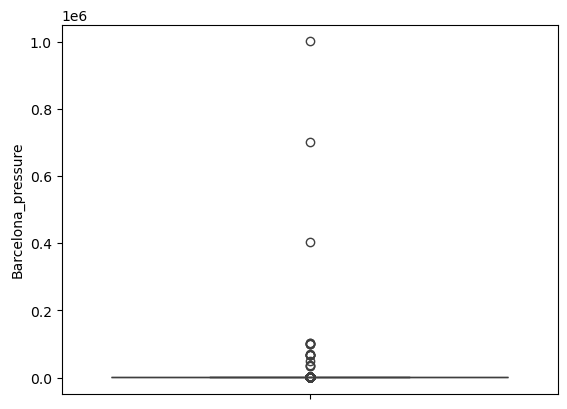

In [12]:
sns.boxplot(df['Barcelona_pressure'])

<Axes: xlabel='Valencia_wind_speed'>

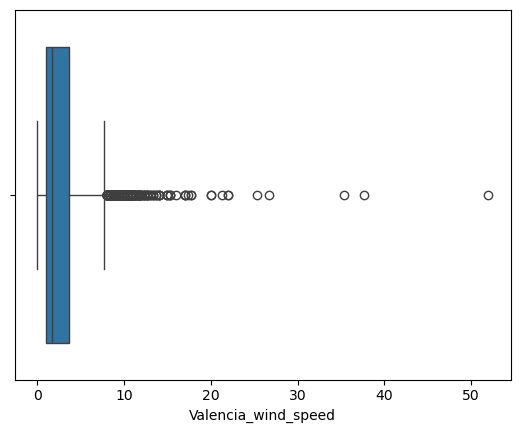

In [13]:
sns.boxplot(x='Valencia_wind_speed', data=df)

(array([7.000e+01, 3.720e+02, 8.370e+02, 1.641e+03, 2.494e+03, 2.301e+03,
        9.000e+02, 1.400e+02, 7.000e+00, 1.000e+00]),
 array([-6618. , -2765.8,  1086.4,  4938.6,  8790.8, 12643. , 16495.2,
        20347.4, 24199.6, 28051.8, 31904. ]),
 <BarContainer object of 10 artists>)

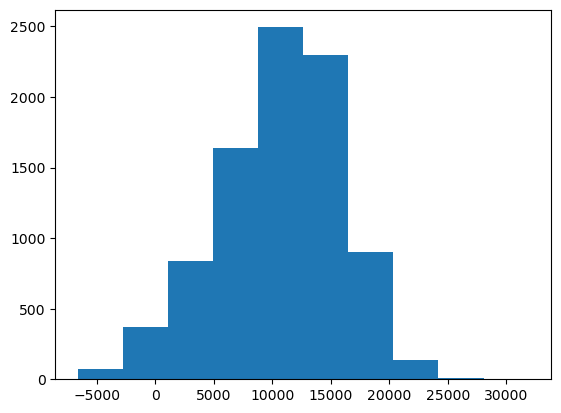

In [14]:
plt.hist(df['load_shortfall_3h'])

In [15]:
print(df.index.to_series().diff().value_counts())  # Sprawdzanie odstępów czasowych

time
0 days 03:00:00    8760
0 days 09:00:00       2
Name: count, dtype: int64


In [16]:
df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego
df_interpolated = df_resampled.interpolate(method='linear')

C:\Users\Ester\AppData\Local\Temp\ipykernel_5880\3160060319.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('3H').asfreq()  # Tworzenie pełnego zakresu czasowego


In [17]:
# Resampling do dziennych średnich
df_daily = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('D').mean())
df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())

C:\Users\Ester\AppData\Local\Temp\ipykernel_5880\3768631530.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = pd.DataFrame(df_interpolated['load_shortfall_3h'].resample('M').mean())


In [19]:
# plot relevant feature interactions

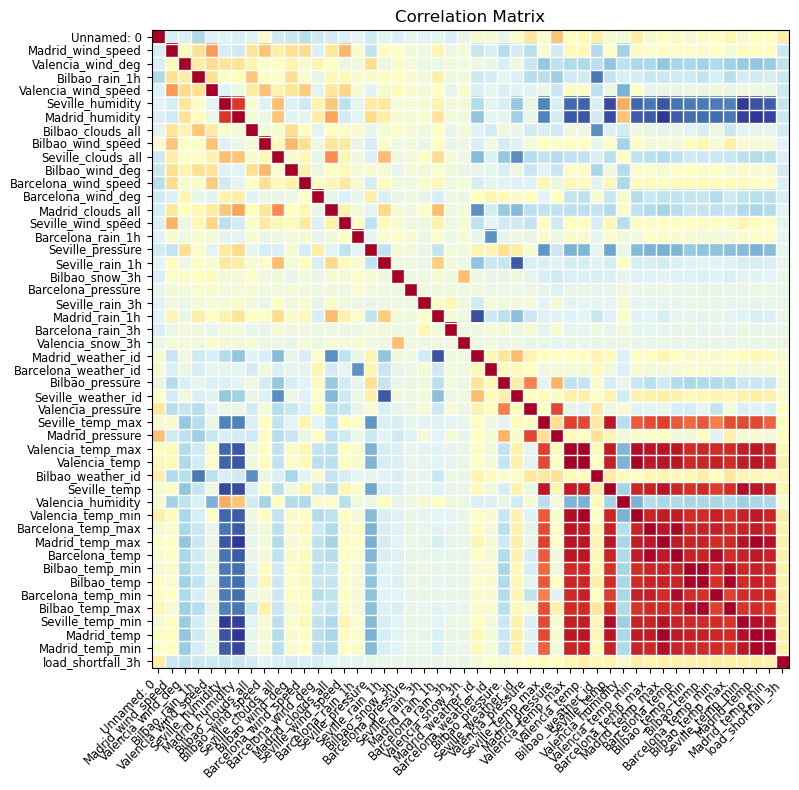

In [20]:
# Visualizing the correlation
fig = plt.figure(figsize=(10,8));
ax = fig.add_subplot(111);
plot_corr(df_interpolated.corr(), xnames = df_interpolated.corr().columns, ax = ax, );

### Analiza sezonowości

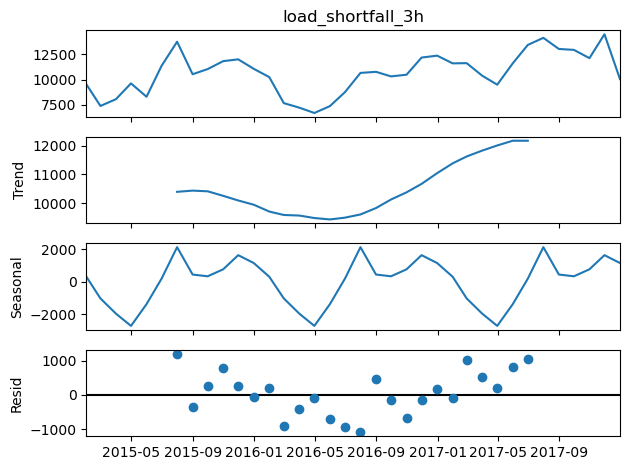

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_monthly['load_shortfall_3h'], model='additive', period=12)

# Wyniki dekompozycji
result.plot()
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [24]:
# remove missing values/ features

In [25]:
# create new features
df_interpolated['Hour_of_day'] = df_interpolated.index.hour
df_interpolated['Day_of_week'] = df_interpolated.index.dayofweek
df_interpolated['Day_of_month'] = df_interpolated.index.day
df_interpolated['Month_of_year'] = df_interpolated.index.month
df_interpolated['Year'] = df_interpolated.index.year
df_interpolated['Day_of_year'] = df_interpolated.index.dayofyear
df_interpolated['Week_of_year'] = df_interpolated.index.isocalendar().week

<Axes: >

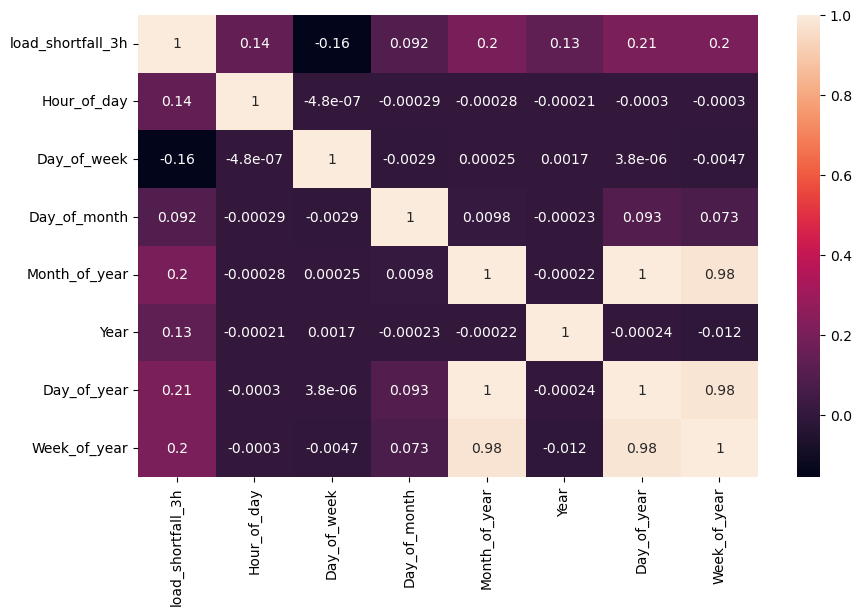

In [26]:
Time_df = df_interpolated.iloc[:,[-8,-7,-6,-5,-4,-3,-2,-1]]
plt.figure(figsize=[10,6])
sns.heatmap(Time_df.corr(),annot=True )

In [27]:
df_interpolated = df_interpolated.drop(columns=['Week_of_year','Day_of_year'])

In [28]:
# engineer existing features

<Axes: >

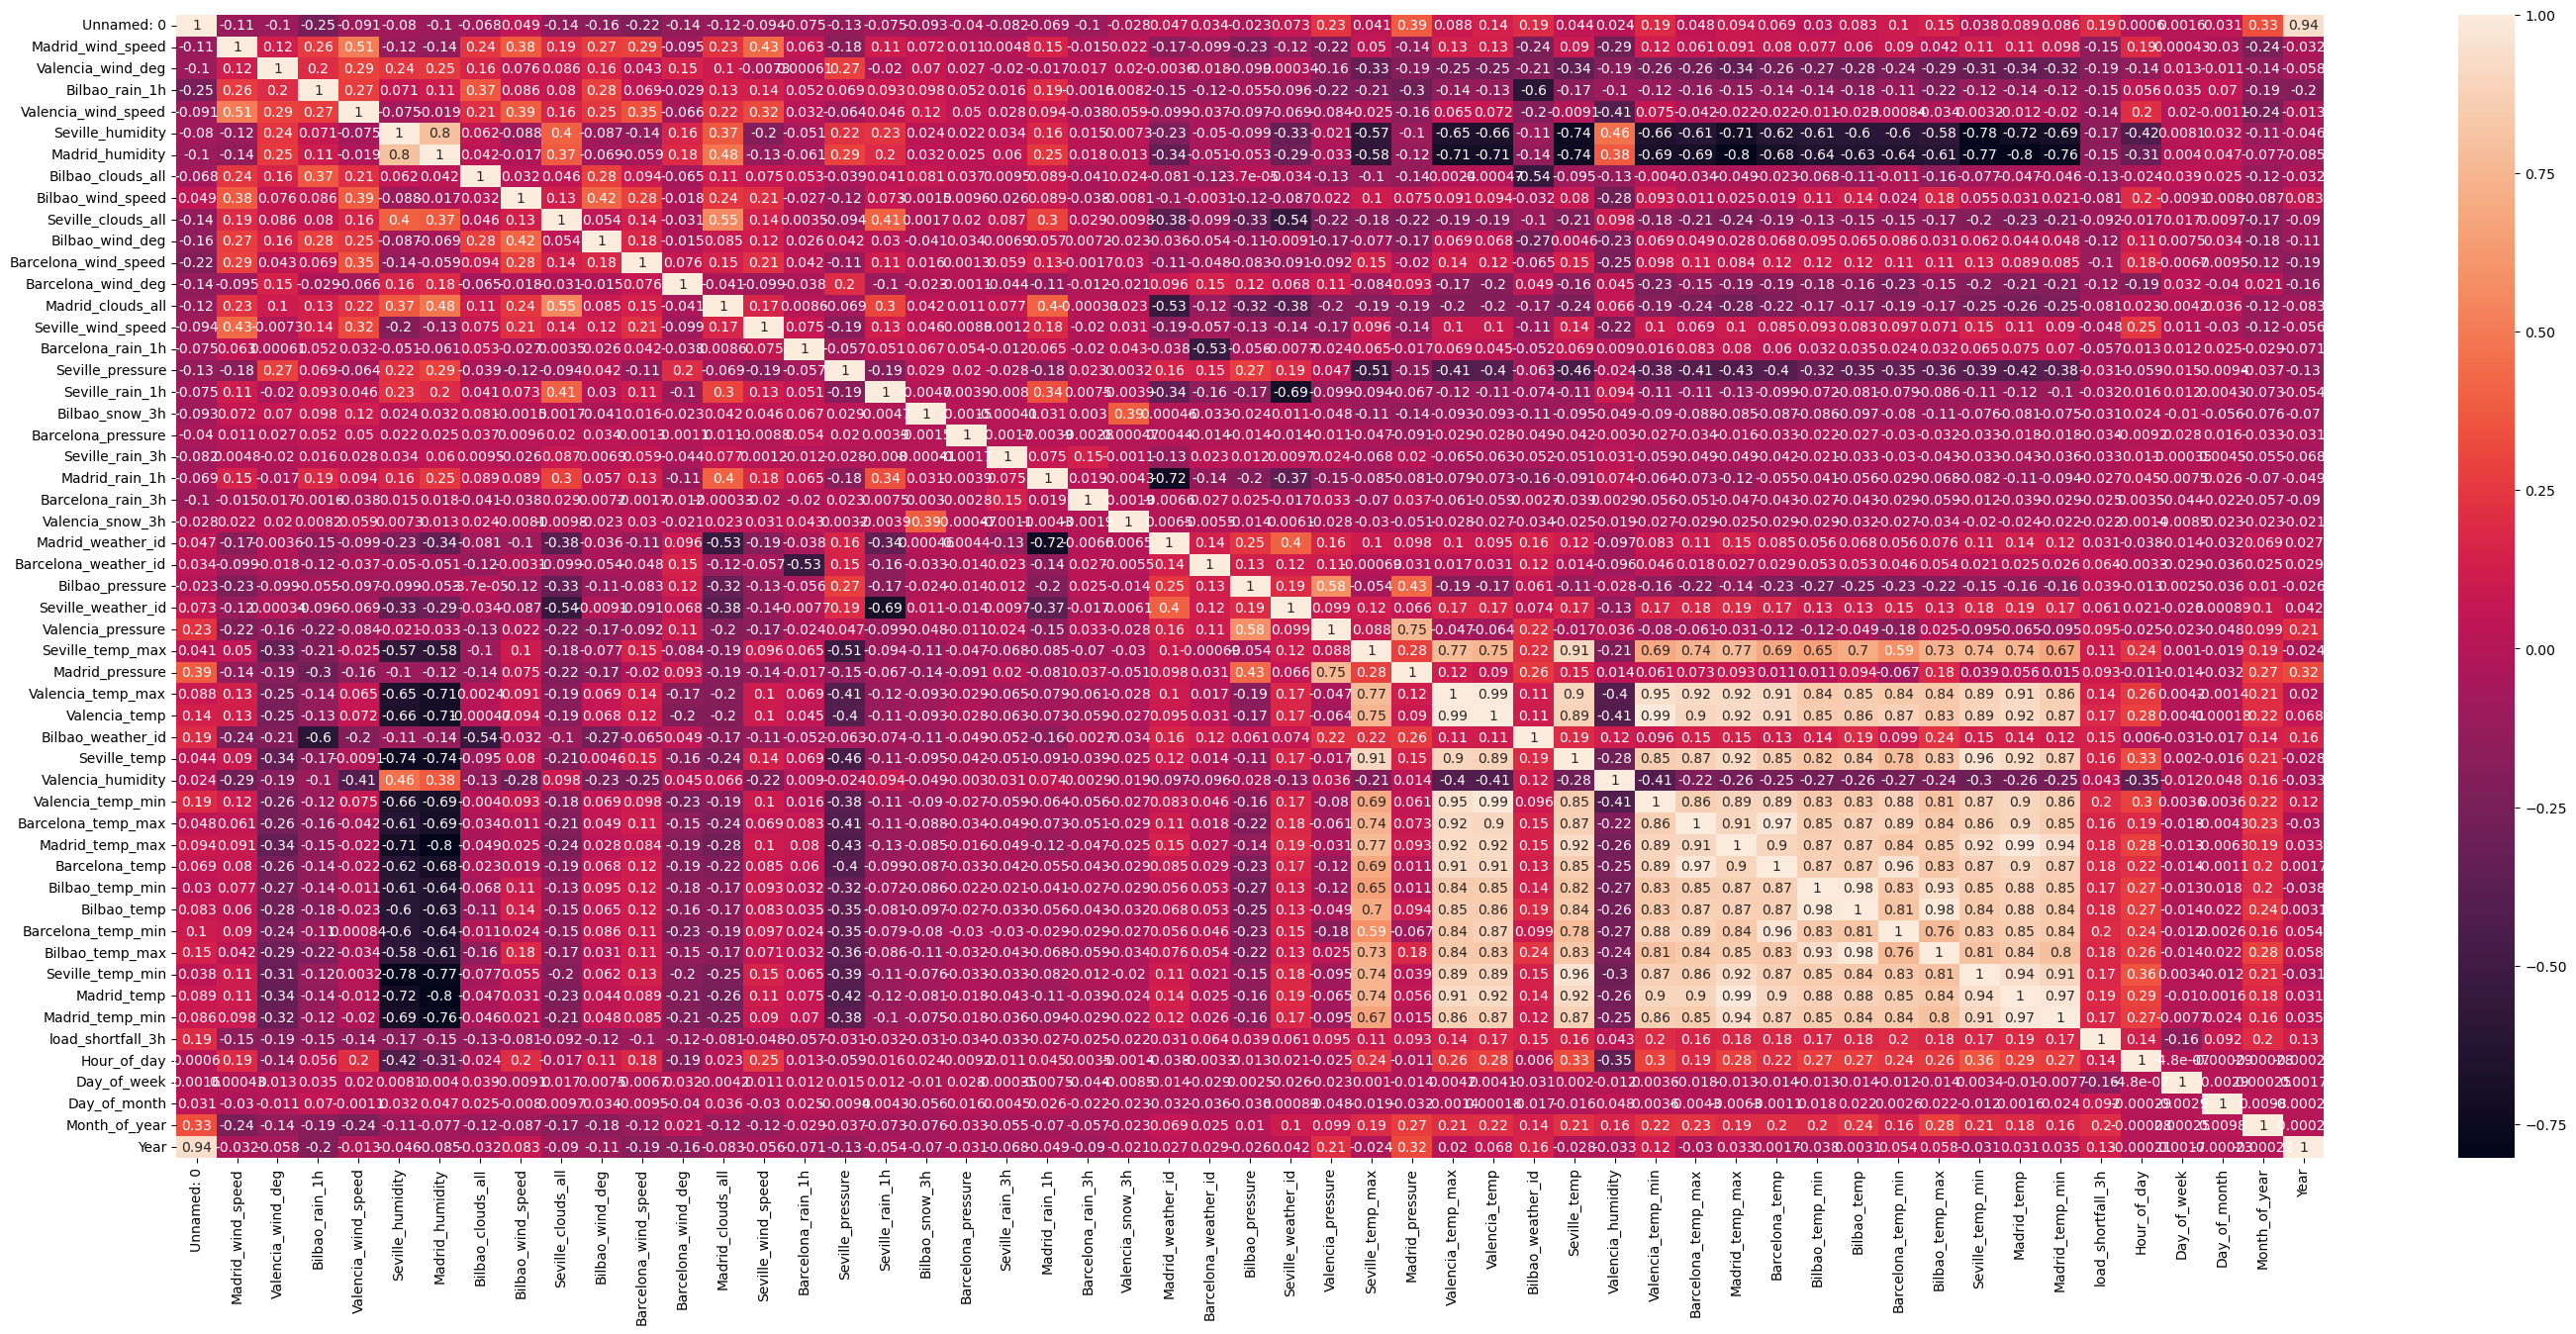

In [29]:
plt.figure(figsize=[35,15])
sns.heatmap(df_interpolated.corr(),annot=True )

In [30]:
X = df_interpolated.drop(columns = 'load_shortfall_3h')
y = df_interpolated['load_shortfall_3h'].astype('int')

In [31]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Features', 'Score']
new_X = featureScores.sort_values('Score',ascending=False).head(40)
new_X.tail(10) #To get the least important feature based on ther score 

,Features,Score
30,Madrid_pressure,3443.288758
23,Valencia_snow_3h,3111.804109
38,Madrid_temp_max,2283.758333
45,Madrid_temp,2108.189336
46,Madrid_temp_min,2056.188931
29,Seville_temp_max,1849.798733
44,Seville_temp_min,1590.806659
34,Seville_temp,1484.595028
31,Valencia_temp_max,1367.235705
37,Barcelona_temp_max,1261.412164


In [32]:
columns_to_drop = [
    "Madrid_pressure", "Madrid_temp_max", "Madrid_temp", "Madrid_temp_min", 
    "Seville_temp_max", "Seville_temp_min", "Seville_temp", "Valencia_temp_max", 
    "Barcelona_temp_max", "Barcelona_pressure", "Valencia_wind_speed", "Valencia_temp_min", "Valencia_temp", "Bilbao_temp_min",
    "Bilbao_temp", "Barcelona_temp_max", "Bilbao_temp_max", "Barcelona_temp_min", "Seville_humidity", "Unnamed: 0"
]

In [44]:
X = X.drop(columns=columns_to_drop, axis = 1)


KeyError: "['Madrid_pressure', 'Madrid_temp_max', 'Madrid_temp', 'Madrid_temp_min', 'Seville_temp_max', 'Seville_temp_min', 'Seville_temp', 'Valencia_temp_max', 'Barcelona_temp_max', 'Barcelona_pressure', 'Valencia_wind_speed', 'Valencia_temp_min', 'Valencia_temp', 'Bilbao_temp_min', 'Bilbao_temp', 'Barcelona_temp_max', 'Bilbao_temp_max', 'Barcelona_temp_min', 'Seville_humidity', 'Unnamed: 0'] not found in axis"

<Axes: >

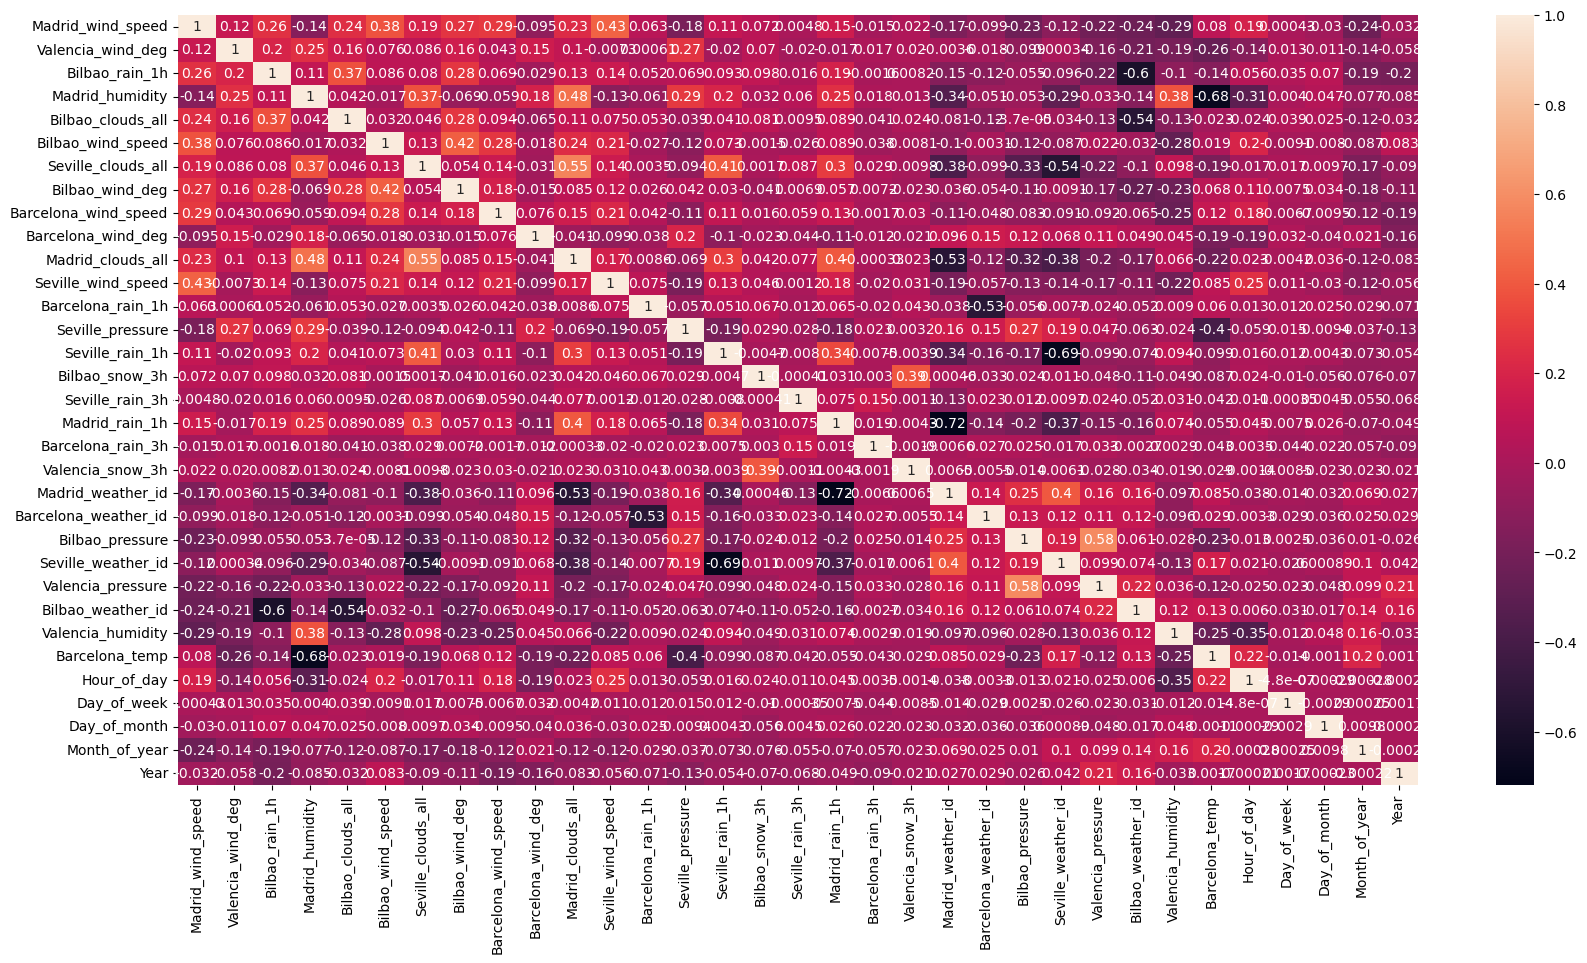

In [34]:
plt.figure(figsize=[20,10])
sns.heatmap(X.corr(),annot=True )

In [48]:
scaler = StandardScaler()
time_index = X.index
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.index = time_index

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,...,Seville_weather_id,Valencia_pressure,Bilbao_weather_id,Valencia_humidity,Barcelona_temp,Hour_of_day,Day_of_week,Day_of_month,Month_of_year,Year
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 03:00:00,-0.950788,-0.096481,-0.361792,0.270476,-1.335373,-0.501473,-0.56532,0.630443,1.932780,-1.660625,...,0.352487,-1.214132,0.649974,0.540992,-1.354283,-1.091347,-0.002738,-1.674269,-1.601346,-1.225479
2015-01-01 06:00:00,-1.130904,1.641084,-0.361792,0.297878,-1.335373,-0.501473,-0.56532,0.607578,0.630495,-0.578942,...,0.352487,-1.032401,0.649974,0.298680,-1.423427,-0.654878,-0.002738,-1.674269,-1.601346,-1.225479
2015-01-01 09:00:00,-0.770673,1.293571,-0.361792,0.284177,-1.335373,-0.501473,-0.56532,0.542252,-0.485749,1.520796,...,0.352487,-0.923363,0.649974,0.021751,-1.266858,-0.218409,-0.002738,-1.674269,-1.601346,-1.225479
2015-01-01 12:00:00,-0.770673,0.946058,-0.361792,-0.044641,-1.335373,-0.501473,-0.56532,0.398532,-0.299709,0.925683,...,0.352487,-0.523554,0.649974,-0.584030,-0.983373,0.218060,-0.002738,-1.674269,-1.601346,-1.225479
2015-01-01 15:00:00,-0.770673,0.598545,-0.361792,-0.017240,-1.273937,-0.894660,-0.56532,0.254813,0.816536,0.779712,...,0.352487,-0.632593,0.649974,-0.359026,-0.864021,0.654529,-0.002738,-1.674269,-1.601346,-1.225479


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [56]:
X_train = X_scaled.loc[X_scaled.index < '2017-05-26 00:00:00']
X_test = X_scaled.loc[X_scaled.index >= '2017-05-26 00:00:00']
y_train = y.loc[y.index < '2017-05-26 00:00:00']
y_test = y.loc[y.index >= '2017-05-26 00:00:00']

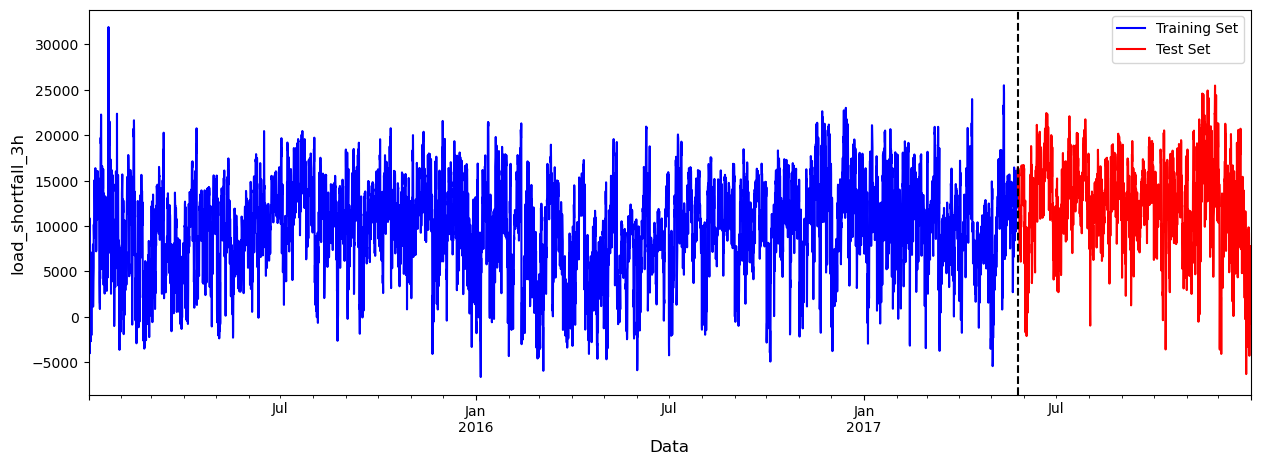

In [58]:
fig, ax = plt.subplots(figsize=(15, 5))
y_train.plot(ax=ax, label='Training Set', color='blue')
y_test.plot(ax=ax, label='Test Set', color='red')
ax.axvline(x='2017-05-26 00:00:00', color='black', ls='--')
ax.legend()
ax.set_xlabel("Data", fontsize=12)
ax.set_ylabel("load_shortfall_3h", fontsize=12)
plt.show()

In [ ]:
#Train one or more ML models

In [60]:
reg = xgb.XGBRegressor(n_estimators=100)
reg.fit(X_train, y_train,
        eval_set = [(X_train, y_train), (X_test, y_test)],
        verbose = True)

[0]	validation_0-rmse:4420.52100	validation_1-rmse:5103.32586
[1]	validation_0-rmse:3971.95687	validation_1-rmse:4893.15074
[2]	validation_0-rmse:3660.30756	validation_1-rmse:4737.29881
[3]	validation_0-rmse:3429.31553	validation_1-rmse:4607.82040
[4]	validation_0-rmse:3205.68580	validation_1-rmse:4496.36220
[5]	validation_0-rmse:3006.78086	validation_1-rmse:4398.36260
[6]	validation_0-rmse:2880.90993	validation_1-rmse:4353.42801
[7]	validation_0-rmse:2786.61328	validation_1-rmse:4278.99985
[8]	validation_0-rmse:2689.72428	validation_1-rmse:4249.40920
[9]	validation_0-rmse:2596.48590	validation_1-rmse:4203.03743
[10]	validation_0-rmse:2514.19426	validation_1-rmse:4083.99317
[11]	validation_0-rmse:2444.12852	validation_1-rmse:4059.26362
[12]	validation_0-rmse:2376.83363	validation_1-rmse:4056.52406
[13]	validation_0-rmse:2328.87836	validation_1-rmse:4038.52445
[14]	validation_0-rmse:2287.51629	validation_1-rmse:4047.13327
[15]	validation_0-rmse:2254.25500	validation_1-rmse:3989.19611
[1

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
# evaluate one or more ML models

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic